# 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_X = diabetes['data']
df_y = diabetes['target']
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
# 선택한 특성들로 데이터 가져오기
selected_features  = [0, 2,3,4,7,8]
df_X = df_X[:, selected_features]

In [4]:
df_X = np.array(df_X)
df_y = np.array(df_y)

In [5]:
# train, test데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 17)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 6) (353,)
(89, 6) (89,)


In [6]:
# 파라미터 초기값 설정
seed_value = 35
np.random.seed(seed_value)

W = np.random.rand(6)

b = np.random.rand()

print(W)
print()
print(b)

[0.45805495 0.30834961 0.23148705 0.27742455 0.81723481 0.11134664]

0.6264372289542525


In [7]:
# 모델 함수 구현하기 
def model(X, W, b):
    prediction = 0
    for i in range(6):
        prediction += X[:,i]*W[i]
    prediction += b
    return prediction

In [8]:
# MSE함수 구현하기
def MSE(predic, y):
    mse = ((predic-y)**2).mean()
    return mse

In [9]:
# loss함수 구현하기
def loss(X, W, b, y):
    predic = model(X,W,b)
    mse = MSE(predic, y)
    return mse

In [10]:
# gradient함수 구현하기
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X,W,b)
    dW = 1/N * 2 * X.T.dot(y_pred - y) 
    db = 2 * (y_pred-y).mean()
    return dW, db

In [11]:
#학습률 설정하기 
LEARNING_RATE = 0.01

In [12]:
# model 학습하기 

losses = []
for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE*dW
    b -= LEARNING_RATE*db
    l = loss(X_train, W, b, y_train)
    losses.append(l)
    if(i%10000 == 0):
        print(f"iteration {i} : loss {l:.4f}")
            

iteration 10000 : loss 3572.1631
iteration 20000 : loss 3221.2919
iteration 30000 : loss 3107.8754
iteration 40000 : loss 3053.6087
iteration 50000 : loss 3024.6311
iteration 60000 : loss 3008.4218
iteration 70000 : loss 2999.0176
iteration 80000 : loss 2993.3749
iteration 90000 : loss 2989.8845
iteration 100000 : loss 2987.6676


In [13]:
# test 데이터로 모델 성능 확인하기 
y_pred = model(X_test, W, b)

mse = loss(X_test, W, b, y_test)
mse

2963.3474497767133

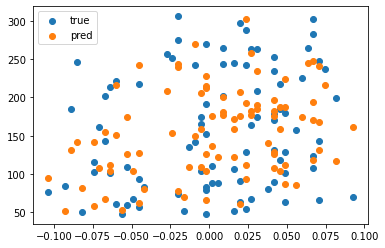

In [14]:
# 시각화하기
plt.scatter(X_test[:,0],y_test, label = 'true')
plt.scatter(X_test[:,0], y_pred, label = 'pred')
plt.legend()
plt.show()

# 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [15]:
# 데이터 가져오기
data = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [16]:
# datetime자료형 변환하기 

data['datetime'] = pd.to_datetime(data['datetime'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [17]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

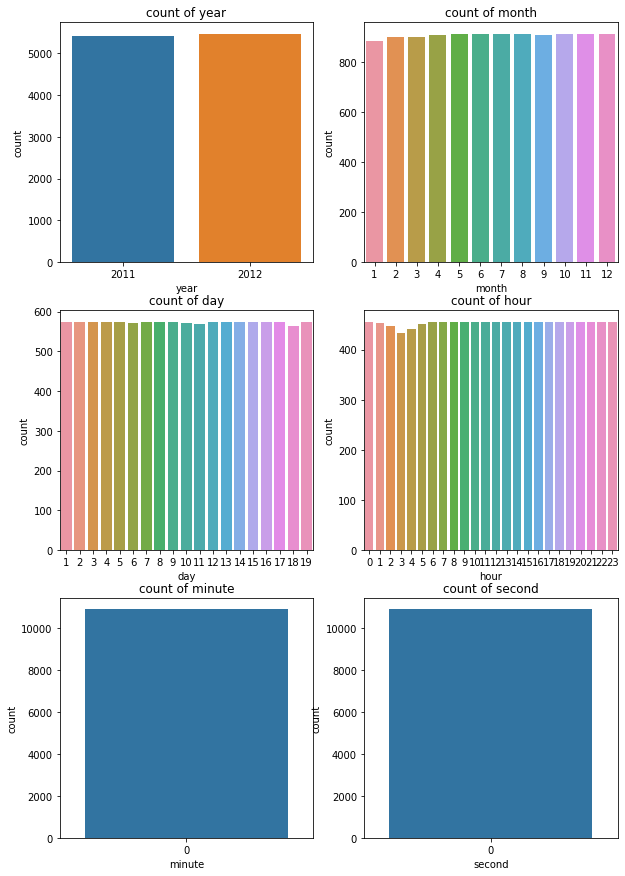

In [18]:
# 시간 속성들에대한 데이터개수 시각화 하기 
plt.figure(figsize = (10,15))

axes = []

for i in range(6):
    axes.append(plt.subplot(3,2,i+1))

columns = ['year', 'month', 'day', 'hour', 'minute', 'second']
for i, column in enumerate(columns):
    sns.countplot(data = data, x = column, ax = axes[i])
    axes[i].set_title(f'count of {column}')

plt.show()

In [19]:
# X, y column 선택
columns = data.columns.to_list()
print(columns)

columns_to_exclude = ['datetime', 'casual', 'registered', 'minute', 'second', 'count']
filtered_columns = [col for col in columns if col not in columns_to_exclude ]
X = data[filtered_columns]
y = data['count']

['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'year', 'month', 'day', 'hour', 'minute', 'second']


In [20]:
# train, test 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 12) (8708,)
(2178, 12) (2178,)


In [21]:
# 모델 불러오기 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
# 모델 학습하기 
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# X_test에 대한 예측값 출력
y_pred = model.predict(X_test)
print(y_pred)

[255.12018894 226.29239061 236.00753371 ... 183.44918622 262.32589747
   9.91557379]


In [24]:
# 손실함수값 계산

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f'MSE : {mse}, RMSE : {rmse}')

MSE : 20401.793737811968, RMSE : 142.8348477711653


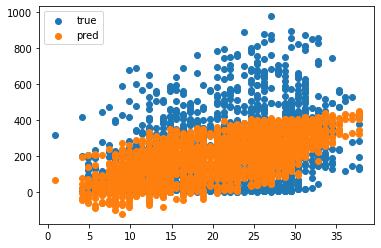

In [25]:
# temp로 시각화하기 
plt.scatter(X_test['temp'],y_test, label = 'true')
plt.scatter(X_test['temp'], y_pred, label = 'pred')

plt.legend()
plt.show()

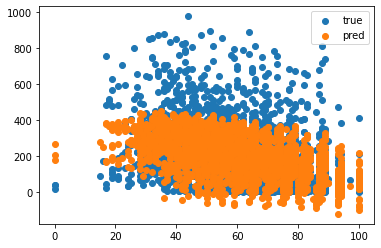

In [26]:
# humidity로 시각화하기 
plt.scatter(X_test['humidity'],y_test, label = 'true')
plt.scatter(X_test['humidity'], y_pred, label = 'pred')

plt.legend()
plt.show()

# 회고

## 배운점
> 데이터 전처리부터 모델 학습의 전과정을 직접 해봄으로써 라이브러리에 이미 만들어져있는 모델이 어떤 방식으로 동작하는지 이해 할 수 있었다.


## 느낀점
> 모델 성능을 높이기 위한 학습에 데이터와 데이터 전처리의 중요성을 다시한번 알 수 있었다.


## 시도해볼것
> 모델의 성능을 높이기 위해 필요한 속성이 어떤 것 이 있을지 추려보고 더 나은 성능을 가지는 모델을 만들어보기